https://colab.research.google.com/drive/1IlrlS3bB8t1Gd5Pogol4MIwUxlAjhWOQ#forceEdit=true&sandboxMode=true&scrollTo=jFRtn5dUu5ZI

Reinforcement Learning
The next and final topic in this course covers Reinforcement Learning. This technique is different than many of the other machine learning techniques we have seen earlier and has many applications in training agents (an AI) to interact with enviornments like games. Rather than feeding our machine learning model millions of examples we let our model come up with its own examples by exploring an enviornemt. The concept is simple. Humans learn by exploring and learning from mistakes and past experiences so let's have our computer do the same.

Q-Learning


Q-Learning is a simple yet quite powerful technique in machine learning that involves learning a matrix of action-reward values. This matrix is often reffered to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions) where each value at matrix[n, m] represents the agents expected reward given they are in state n and take action m. The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take at each state. The idea is that after a succesful training/learning of this Q-Table/matrix we can determine the action an agent should take in any state by looking at that states row in the matrix and taking the maximium value column as the action.

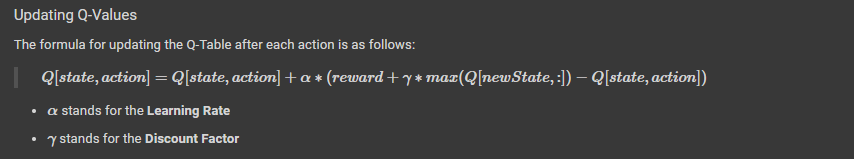

In [1]:
import gym
import random as rd
import matplotlib.pyplot as plt

In [358]:
#load enviornment
env=gym.make('FrozenLake-v1', render_mode="rgb_array",  is_slippery=False)
env.action_space.seed(41)
print(env.observation_space)           #get number of observation spaces and data type
print(env.action_space)                #get number of actions spaces and its type

Discrete(16)
Discrete(4)


In [359]:
action= env.action_space.sample()# get a random action 
Move=["LEFT", "DOWN", "RIGHT", "UP"]
print(Move[action])

RIGHT


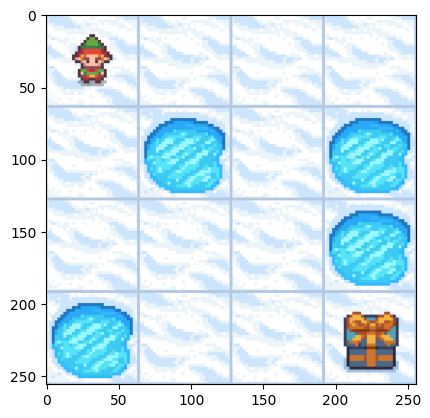

In [437]:
env.reset()                     #reset enviornment to its default state
plt.imshow(env.render())

5 0 True False {'prob': 1.0}
RIGHT


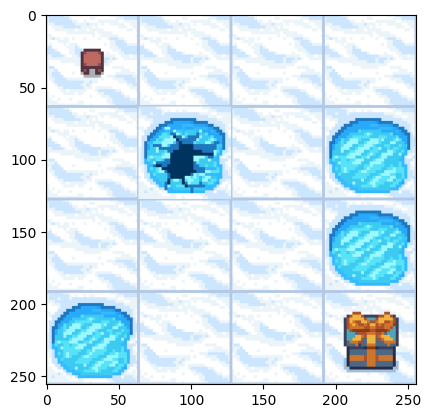

In [442]:
action= rd.randint(0, env.action_space.n-1)# get a random action
obs, reward, terminated, truncated , info = env.step(action)  # take action, notice it returns information about the action
print(obs, reward, terminated, truncated, info)
print(Move[action])
plt.imshow(env.render())   # render the GUI for the enviornment

TypeError: TimeLimit.step() missing 1 required positional argument: 'action'

Training a model to play the game of FrozenLake-v1.

In [4]:
import gym
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time

In [129]:
#load enviornment
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="rgb_array")
state=env.observation_space.n                  #Size of the map
action=env.action_space.n                      #4 [Up/DOWN/LEFT/RIGHT]

In [130]:
#building the q table
Q=np.zeros((state, action))

In [123]:
Epilson= 0.9
Tries=50
maxmove=16

Visualize= True
learning_rate=0.81

epsilon = 0.9  # start with a 90% chance of picking a random action

In [218]:
# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

print(action)

2


In [10]:
import numpy as np
a=np.arange(0,9).reshape(3,3)
a[:,1]

array([1, 4, 7])

: 